In [1]:
import random
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import math
from utils.plotTools import plot_qwak
import os
import ast
import numpy as np
import json

from scripts import load_list_from_file, write_list_to_file, load_or_generate_data, draw_graph, draw_graph_from_adjacency_matrix

In [2]:
def estimate_hitting_time(m_values, n_values, start_vertex, end_vertex, num_simulations=10):
    """
    Estimate the hitting time between two vertices in a list of lollipop graphs.

    Parameters:
    m_values (list): The list of m values, each representing the number of vertices in the complete graph part of a lollipop graph.
    n_values (list): The list of n values, each representing the number of vertices in the path part of a lollipop graph.
    start_vertex (int): The starting vertex for the random walk.
    end_vertex (int): The target vertex for the random walk.
    num_simulations (int): The number of simulations to perform.

    Returns:
    hitting_times (list): A list of estimated average hitting times for each lollipop graph.
    """

    hitting_times = []

    for m, n in zip(m_values, n_values):
        print(f'\nCalculatig hitting time for m = {m} and n={n}')
        total_steps_for_all_simulations = 0

        # Create the lollipop graph
        graph = nx.lollipop_graph(m, n)
        # print(list(graph.nodes)[-1])
        # print(end_vertex)
        # print(list(graph.nodes)[end_vertex])
        current_node = list(graph.nodes)[start_vertex]
        end_node = list(graph.nodes)[end_vertex]
        print(f'Starting node: {current_node} \t Neighbors: {list(nx.neighbors(graph,current_node))}')
        print(f'End node: {end_node} \t Neighbors: {list(nx.neighbors(graph,end_node))}')
        for s in range(num_simulations):
            if s==0 or s==1 or s==10 or s==25 or s==35 or s==49 or s==59 or s==69 or s==79 or s==89 or s==99:
                print(f'----> Sample number:{s}')
                pass
            total_steps_this_simulation = 0
            current_node = list(graph.nodes)[start_vertex]
            # Loop continues until end_vertex is reached
            while current_node != end_node:
                # Choose a neighbor randomly
                neighbors = list(nx.neighbors(graph, current_node))
                if neighbors:
                    current_node = random.choice(neighbors)
                total_steps_this_simulation += 1
                # print(current_node)
                # print(end_node)
                # print()

            # Accumulate the total steps for this simulation
            total_steps_for_all_simulations += total_steps_this_simulation

        # Average the total steps over the number of simulations
        average_hitting_time = total_steps_for_all_simulations / num_simulations
        hitting_times.append(average_hitting_time)

    return hitting_times

def theoretical_hitting_time(n):
    hitting_times = []
    for i in n:
        hitting_times.append(i**3)
       
    return hitting_times

In [3]:
m_range = range(2, 50)
# m = 20
n_range = range(2, 50)
# n = 20
sum_range = []
samples = 100

sum_range = list(map(lambda x, y: x + y, m_range, n_range))

initVertex = 0
targetVertex = -1

hitting_times_file = f'Datasets/DynGraphsDTRW/hittingTimeLollipop_N{sum_range[-1]}_FROM{initVertex}-TO{targetVertex}_S{samples}.txt'

print(f'Looking for: \n-----> {hitting_times_file}')

if os.path.exists(hitting_times_file):
    hitting_times = load_list_from_file(hitting_times_file)
    theoretical_hitting_times = theoretical_hitting_time(sum_range)
    print('\nFile exists!')
else:
    print('\nFile Doesnt Exist!')
    hitting_times = estimate_hitting_time(m_range,n_range,initVertex,targetVertex,samples)
    theoretical_hitting_times = theoretical_hitting_time(sum_range)

    write_list_to_file(hitting_times_file, hitting_times)



Looking for: 
-----> Datasets/DynGraphsDTRW/hittingTimeLollipop_N98_FROM0-TO-1_S100.txt

File Doesnt Exist!

Calculatig hitting time for m = 2 and n=2
Starting node: 0 	 Neighbors: [1]
End node: 3 	 Neighbors: [2]
----> Sample number:0
----> Sample number:1
----> Sample number:10
----> Sample number:25
----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> Sample number:89
----> Sample number:99

Calculatig hitting time for m = 3 and n=3
Starting node: 0 	 Neighbors: [1, 2]
End node: 5 	 Neighbors: [4]
----> Sample number:0
----> Sample number:1
----> Sample number:10
----> Sample number:25
----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> Sample number:89
----> Sample number:99

Calculatig hitting time for m = 4 and n=4
Starting node: 0 	 Neighbors: [1, 2, 3]
End node: 7 	 Neighbors: [6]
----> Sample number:0
----> Sample number:1
----> Sample number

----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> Sample number:89
----> Sample number:99

Calculatig hitting time for m = 23 and n=23
Starting node: 0 	 Neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
End node: 45 	 Neighbors: [44]
----> Sample number:0
----> Sample number:1
----> Sample number:10
----> Sample number:25
----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> Sample number:89
----> Sample number:99

Calculatig hitting time for m = 24 and n=24
Starting node: 0 	 Neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
End node: 47 	 Neighbors: [46]
----> Sample number:0
----> Sample number:1
----> Sample number:10
----> Sample number:25
----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> S

----> Sample number:1
----> Sample number:10
----> Sample number:25
----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> Sample number:89
----> Sample number:99

Calculatig hitting time for m = 41 and n=41
Starting node: 0 	 Neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
End node: 81 	 Neighbors: [80]
----> Sample number:0
----> Sample number:1
----> Sample number:10
----> Sample number:25
----> Sample number:35
----> Sample number:49
----> Sample number:59
----> Sample number:69
----> Sample number:79
----> Sample number:89
----> Sample number:99

Calculatig hitting time for m = 42 and n=42
Starting node: 0 	 Neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
End node: 83 	 Neighbors: [82]


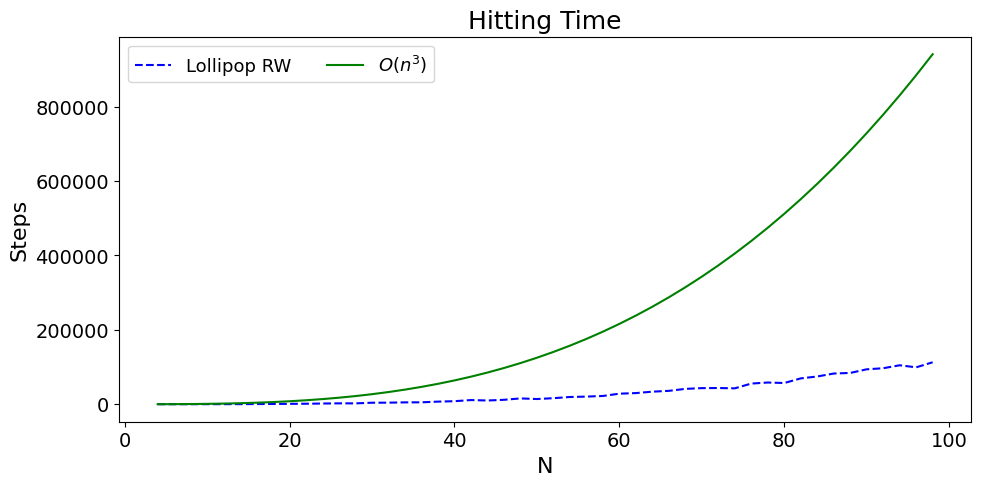

In [4]:
alphaLabelList = [r'Lollipop RW',r'$O(n^3)$']

params = {
    'font_size' : 14,
    'figsize': (11, 5),
    'plot_title' : f'Hitting Time',
    'x_label' : 'N',
    'y_label' : "Steps",
    'legend_labels' : alphaLabelList,
    'legend_loc': "best",
    # 'legend_title' : r'$\alpha$',
    'legend_ncol' : 3,
    'color_list' : ['#0000FF', '#008000', '#525252'],
    'line_style_list' : ['--', '-','-.' ],
    # 'save_path' : f'Output/OrientedDynamics/orientedDynamics_N{N}_NWALKS{len(alphaList)}_Alphas{str([round(a, 2) for a in alphaList]).replace(", ", "-").replace("[", "").replace("]", "")}_TMAX{round(t)}.png',
    'use_loglog': False,
    'use_cbar' : False,
    'cbar_label' : None, 
    'cbar_ticks' : None,
    'cbar_tick_labels' : None,
    'x_lim' : None,
    # 'x_num_ticks' : 7,
    # 'y_num_ticks' : 7,
    # 'x_round_val' : 1,
    # 'y_round_val' : 3,
}

plot_qwak(x_value_matrix = [list(sum_range),list(sum_range)] , y_value_matrix = [hitting_times,theoretical_hitting_times],**params)

In [5]:
print(list(nx.lollipop_graph(50,50).nodes))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [6]:
print(list(nx.neighbors(nx.lollipop_graph(50,50),0)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
